# Classify plant species as Setosa or Virginica


## Introduction

This notebook is used to build a neural network model that identifies and classifies the given plant species.


> There are two classes:


*   Setosa
*   Virginica





## Data Description


**Iris Dataset**

*   sepal_length: Sepal length in cm
*   sepal_width: Sepal width in cm
*   petal_length: Sepal length in cm
*   petal_width: Sepal width in cm
*   species: (setosa, versicolor, virginica) 
  
Here we consider only the first two species

---



*The dataset is downloaded from seaborn library*

## Loading basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import datetime

## Loading the dataset

#### Loading the data

In [ ]:
iris = sns.load_dataset("iris")

In [ ]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
56,6.3,3.3,4.7,1.6,versicolor
141,6.9,3.1,5.1,2.3,virginica
44,5.1,3.8,1.9,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
120,6.9,3.2,5.7,2.3,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Separating input and output variables

In [ ]:
# Deleting the records of species Virginica
iris = iris[iris['species']!='virginica']

In [ ]:
iris.species.value_counts()

versicolor    50
setosa        50
Name: species, dtype: int64

In [ ]:
X = iris.drop('species', axis=1)
y = iris.species

In [ ]:
y.value_counts()

versicolor    50
setosa        50
Name: species, dtype: int64

## Some Visualizations

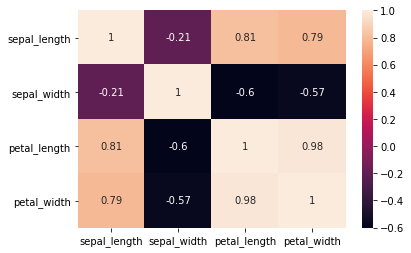

In [ ]:
sns.heatmap(iris.corr(), annot=True)

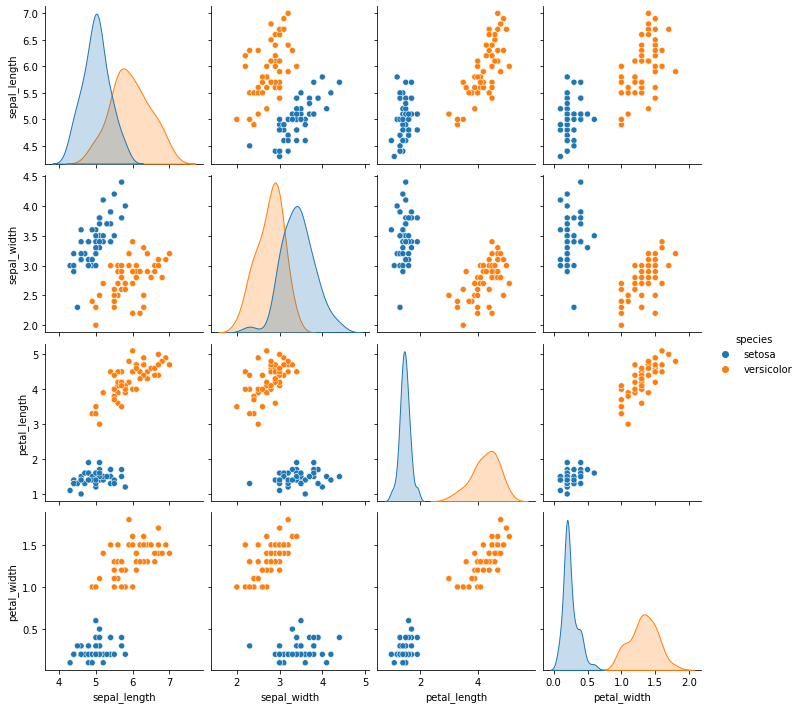

In [ ]:
sns.pairplot(iris,hue='species')

## Basic Preprocessing

In [ ]:
labels_y = []
for item in y:
  if item == 'setosa':
    labels_y.append(0)
  else:
    labels_y.append(1)

labels_y = np.array(labels_y)

In [ ]:
np.unique(labels_y, return_counts=True)

(array([0, 1]), array([50, 50]))

## Splitting into training and test data sets

In [ ]:
# Setting the seed
from numpy.random import seed
seed(1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels_y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(80, 4)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([40, 40]))

In [ ]:
# checking total number of records / data points available in the X_train dataset
print("There are", len(X_train), "records in the training dataset")     
print("There are", len(X_test), "records in the test dataset") 

There are 80 records in the training dataset
There are 20 records in the test dataset


## Model Building

Importing necessary libraries

In [ ]:
import tensorflow as tf  
from tensorflow import keras  

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

### 1. Defining the model

**Model architecture**

Model : Sequential

*   Input shape = (4,)
*   No. of neurons/units in the Input layer = 4
*   No. of neurons/units in the first Dense layer = 10
*   No. of neurons/units in the Output layer = 1


---


*  The input and hidden layer use ReLU (Rectified Linear Units) as the activation function. ReLU is a half rectified function; that is, for all the inputs less than 0 (e.g. -120,-6.7, -0.0344, 0) the value is 0 while for anything positive (e.g. 10,15, 34) the value is retained. ReLu is defined as f(x) = max(0,x)

*  The output layer uses the sigmoid activation function that will squeeze all the values between 0 and 1.





In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 2. Compiling the model

*   **rmsprop** is used as the **Optimizer**
*   **Learning Rate** is taken as **0.001**
*   **loss function** used is **binary_crossentropy** - For binary classification problems that give output in the form of probability, binary_crossentropy is usually the optimizer of choice. Here we have two classes - setosa and versicolor.

*   **metrics** used used to evaluate the model is **accuracy** - Accuracy calculates how often the predictions calculated by the model are correct.


In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer=RMSprop(0.001)  
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Plotting the model

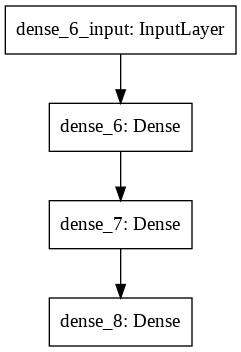

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

### 3. Fitting the model

The model is trained for

*   **epoch** = 200
*   **batch_size** = 10
*   **validation_split** = 0.2
---
Optimization Technique

**Early Stopping** is used as an optimization technique to avoid overfitting of data. 
*   **monitor** : any metric can be chosen to monitor like val_loss, val_accuracy. Here it's val_loss.
*  **patience** : patience is the number to epochs to wait before stopping it. Here it's 5.


In [ ]:
path = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

In [ ]:
history=model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1, callbacks=[tensorboard_callback,es_callback])

Epoch 1/200
7/7 [==============================] - 0s 34ms/step - loss: 0.6462 - accuracy: 0.4844 - val_loss: 0.6036 - val_accuracy: 0.5625
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6142 - accuracy: 0.5469 - val_loss: 0.5855 - val_accuracy: 0.8750
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.5917 - accuracy: 0.9688 - val_loss: 0.5689 - val_accuracy: 1.0000
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.5729 - accuracy: 1.0000 - val_loss: 0.5521 - val_accuracy: 1.0000
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.5548 - accuracy: 1.0000 - val_loss: 0.5358 - val_accuracy: 1.0000
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.5379 - accuracy: 1.0000 - val_loss: 0.5215 - val_accuracy: 1.0000
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.5204 - accuracy: 1.0000 - val_loss: 0.5075 - val_accuracy: 1.0000
Epoch 8/200
7/7 [=========

### 4. Evaluating the model

The model is evaluated using the data not used in the training process i.e. the X_test.

In [ ]:
X_test.shape

(20, 4)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)

print('\nTest accuracy:', test_acc)

1/1 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 1.0000

Test accuracy: 1.0


## Accuracy and Loss Visualizations

**Model Accuracy**

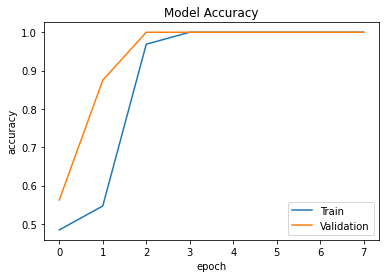

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**Model Loss**

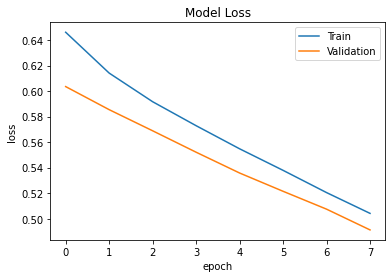

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()